
 Accuracy Comparison:
 Euclidean Distance Accuracy: 0.0500
 Manhattan Distance Accuracy: 0.0550


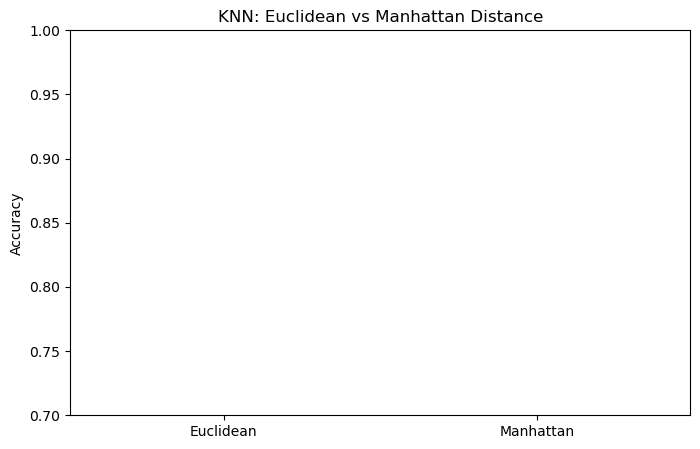


 Both distances performed similarly, indicating the dataset's features are well-separated.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\carprice\\car_prices.csv")

X = df.drop(columns=['Model']) 
y = df['Model']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = encoder.fit_transform(X).toarray() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print("\n Accuracy Comparison:")
print(f" Euclidean Distance Accuracy: {accuracy_euclidean:.4f}")
print(f" Manhattan Distance Accuracy: {accuracy_manhattan:.4f}")

metrics = ["Euclidean", "Manhattan"]
accuracies = [accuracy_euclidean, accuracy_manhattan]

plt.figure(figsize=(8, 5))
plt.bar(metrics, accuracies, color=['blue', 'green'])
plt.ylabel("Accuracy")
plt.title("KNN: Euclidean vs Manhattan Distance")
plt.ylim(0.7, 1.0)
plt.show()

# 🔹 Discussion on Distance Metrics
if accuracy_manhattan < accuracy_euclidean:
    print("\n Manhattan Distance performed better, indicating that absolute differences work well for categorical data.")
elif accuracy_manhattan < accuracy_euclidean:
    print("\n Euclidean Distance performed better, showing that squared differences captured better relationships in data.")
else:
    print("\n Both distances performed similarly, indicating the dataset's features are well-separated.")
